<a href="https://colab.research.google.com/github/vaishusbabu/datascience/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LGMVIP - DATA ANALYTICS**

**Let's Grow More VIRTUAL INTERNSHIP PROGRAM 2021 November Batch**
**Task 3**

**(INTERMEDIATE LEVEL TASK)**

**Prediction using Decision Tree Algorithm**

**Decision Tree Visualization**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("iris.csv")
df.columns=['id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
df.head()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df1=df.copy()
df1.head()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df1.shape

(150, 6)

In [6]:
df1.duplicated().sum()

0

In [7]:
df1 = df1.drop_duplicates()

In [8]:
df1.corr()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


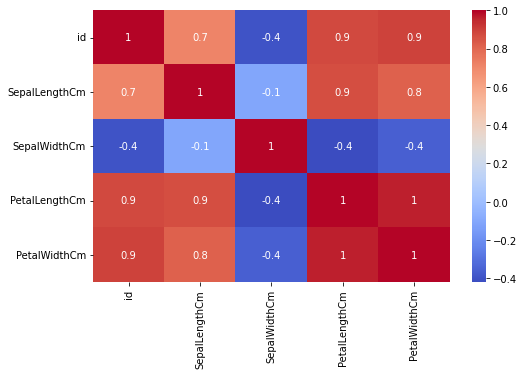

In [9]:
plt.figure(figsize=(8,5))
sns.heatmap(df1.corr(),annot=True,cbar=True,cmap='coolwarm',fmt='0.1g')
plt.show()

In [10]:
print(df1.skew())

id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64


In [11]:
df1['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
df1['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [13]:
df1.groupby(['Species']).count()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


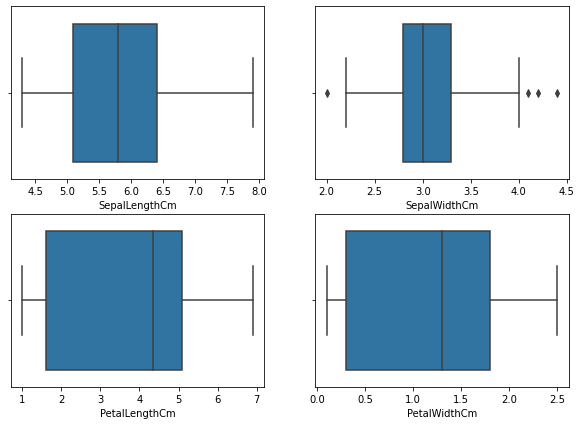

In [14]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.boxplot(x=df1.SepalLengthCm)
plt.subplot(2,2,2)
sns.boxplot(x=df1.SepalWidthCm)
plt.subplot(2,2,3)
sns.boxplot(x=df1.PetalLengthCm)
plt.subplot(2,2,4)
sns.boxplot(x=df1.PetalWidthCm)
plt.show()

In [15]:
a=df1.shape[0]
df1=df1[df1['SepalWidthCm']<4] 

In [16]:
print(df1.shape)

(146, 6)


In [17]:
df.shape

(150, 6)

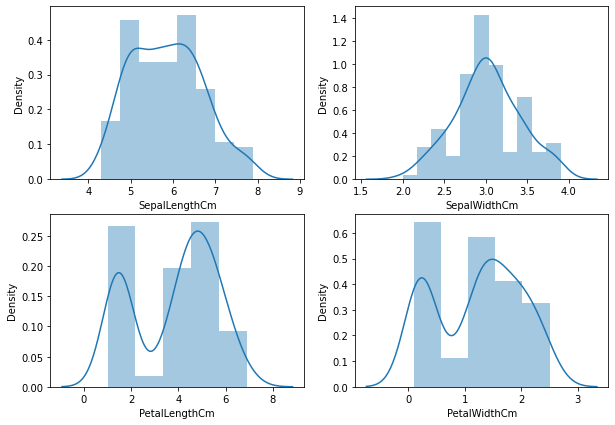

In [18]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.distplot(df1.SepalLengthCm)
plt.subplot(2,2,2)
sns.distplot(df1.SepalWidthCm)
plt.subplot(2,2,3)
sns.distplot(df1.PetalLengthCm)
plt.subplot(2,2,4)
sns.distplot(df1.PetalWidthCm)
plt.show()

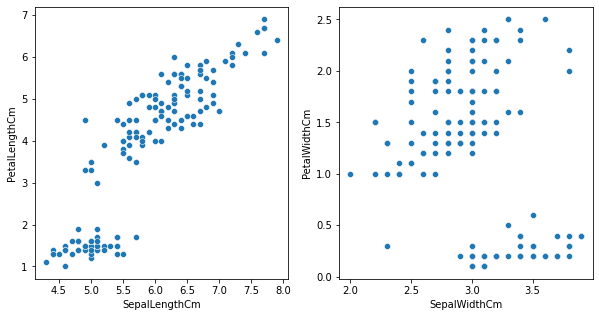

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(df1.SepalLengthCm,df1.PetalLengthCm)
plt.subplot(1,2,2)
sns.scatterplot(df1.SepalWidthCm,df1.PetalWidthCm)
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
df2=df1['Species']
df2 = pd.DataFrame(df2)
df2['Spcies_encoded']=LabelEncoder().fit_transform(df2[['Species']])
print(df2.value_counts())
df2 = df2.drop(['Species'],axis=1)
df2.sample(5)

Species          Spcies_encoded
Iris-virginica   2                 50
Iris-versicolor  1                 50
Iris-setosa      0                 46
dtype: int64


,Spcies_encoded
128,2
74,1
51,1
114,2
65,1


In [22]:
x = df1.drop(['Species'],axis=1)
y = df2

In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)
print('xtrain:',xtrain.shape)
print('xtest:',xtest.shape[0])
print('ytrain:',ytrain.shape)
print('ytest:',ytest.shape[0])


xtrain: (102, 5)
xtest: 44
ytrain: (102, 1)
ytest: 44


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model = DecisionTreeClassifier()
model = model.fit(xtrain,ytrain)

In [33]:
predict = model.predict(xtest)
accuracy_score(ytest,predict)

0.9772727272727273

In [34]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        17

    accuracy                           0.98        44
   macro avg       0.97      0.98      0.97        44
weighted avg       0.98      0.98      0.98        44



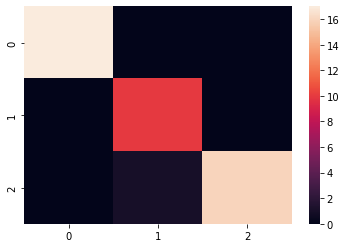

In [35]:
sns.heatmap(confusion_matrix(ytest,predict))

In [36]:
print('accuracy:',accuracy_score(ytest,predict)*100)

accuracy: 97.72727272727273


In [37]:
from sklearn import tree

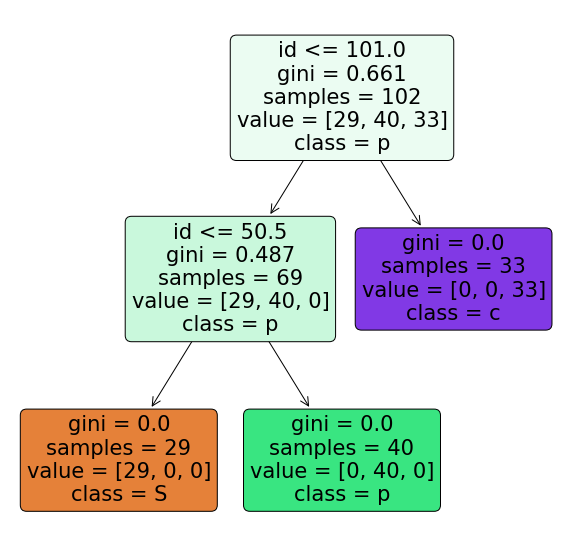

In [38]:
plt.figure(figsize=(10,10))
tree.plot_tree(model,feature_names=df1.columns[:-1],class_names=df2.columns[0],rounded=True,filled=True)
plt.show()

In [39]:
id=input("id:")
sepal_length = input("sepal_length:")
sepal_width = input("sepal_width:")
petal_length = input("petal_length:")
petal_width = input("petal_width:")

data = [[id,sepal_length,sepal_width,petal_length,petal_width]]

def infer(data):
    predicted = model.predict(data)[0]
    if predicted == 0:
        print("Iris-setosa")
    if predicted == 1:
        print("Iris-versicolor")
    if predicted == 2:
        print("Iris-virginica")
        
print("\npredicted Species:")
        
infer(data)

id:1
sepal_length:4.2
sepal_width:1
petal_length:0.3
petal_width:0.5

predicted Species:
Iris-setosa
